# PA005: High Value Customer Identification ( Insiders )

## Ciclo 00 Planejamento da Solução( IOT )

### Input - Entrada

1. Problema de Negócio
- Selecionar os clientes mais valiosos para integrar um programa de Fidelização. 

2. Conjunto de Dados
- Vendas de um e-commerce online, durante o período de um ano. 

### Outpout - Saída

1. indicação das pessoas que farão parte do programa de Insiders 
- Lista: client_id|is_insider|
    
            10323 | yes/1
            32413 | no/1
            
2. Relatório com as respostas das perguntas de negócio.

- Quem são as pessoas elegíveis para participar do programa de
Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do
Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos
meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da
base ?
- Quais ações o time de marketing pode realizar para aumentar o
faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de
Insiders ?
    - O que é ser elegível ?  O que são clientes de maior "valor"
    - Faturamento: 
        - Alto Ticket médio.
        - Alto LTV(receita média por cliente durante o relacionamento com a empresa.)
        - Baixa Recência(tempo desde a ultima compra)
        - Alto bascket size( Tamanho da sexta de compra)
        - Baixa probabilidade de churn(Cliente para de comprar).
        
        
    - Custo:
        - Baixa Taxa de devolução. 
               
        
    - Experiência de Compra:
        - Média alta das avaliação.         
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes.
    - % do grupo Insiders
    
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização. 

    - Escrever características do consumo.
        - Atributos da clusterização. 
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
         - Faturamento total do ano.
         - Faturamento do grupo de Insiders
         
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
        - LTV do grupo Insiders
        - Análise de cohort()

6. Quais as condições para uma pessoa ser elegível ao Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser similar ou parecido com uma pessoa grupo. 
               
7. Quais as condições para uma pessoa ser removida do Insiders ?
        - Definir a periodicidade( 1 mês, 3 mêses )
        - A pessoa precisa ser desimilar ou não-parecido com uma pessoa grupo. 
        
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Baysiano
    - Teste de hipótese

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frente 
    - Visita a empresa

## Ciclo 01 - Métricas de Validação de Cluster

1. Feature Engineering
- Recências
- Frequência
- Monetização

2. Métricas de Validação de Clustering
- wss( Within-CLuster Sum of Square)
- SS( Silhouette Score)

3. Cluster Analysis
- Plot 3D
- Cluster Profile

## Ciclo 02 - Métricas de Validação de Cluster

1. Feature Engineering
- Avarage Ticket

2. Análise de Silhouette
- Silhouette Analysis

3. Cluster Visualization
- UMAP

4. Cluster Análise de Perfil
- Descrição dos centróides dos cluster


## Ciclo 03 - Métricas de Validação de Cluster

1. Análise Descritiva
- Atributos numéricos
- Atributos categóricos

2. Feature Engineering
- Avarage Recebcy
- Number of Returns

3. Data preparation
- Standard Scaler


# 0.0 Imports

## 0.1. Libries

In [112]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import umap.umap_ as umap
import regex      as re

from matplotlib          import pyplot  as plt

from sklearn             import cluster as c
from sklearn             import preprocessing as pp
from sklearn.cluster     import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn             import metrics as m

from plotly              import express as px

from pandas_profiling    import ProfileReport



import warnings
warnings.filterwarnings('ignore')


## 0.2. Helper Function

## 0.3. Load Dataset

In [2]:
#Load data
df_raw = pd.read_csv('data/Ecommerce.csv', sep=',', encoding = "ISO-8859-1")

#Drop extra column
df_raw = df_raw.drop( columns = ['Unnamed: 8'], axis = 1 )

In [3]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Descrição dos Dados

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columuns

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
cols_new= ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 541909
Number of cols: 8


## 1.3. Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [11]:
#separar um dataframe só com os dados que tem customer_id NaN(df_missing)
df_missing = df1.loc[df1['customer_id'].isna(), :]

#separar um dataframe só com os dados que tem customer_id sem Nan
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [12]:
#create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange(19000, 19000+len( df_backup ), 1 )

#merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on = 'invoice_no', how = 'left' )

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'])

#drop extra columns
df1 = df1.drop( columns = ['customer_id_x', 'customer_id_y'], axis = 1)

In [13]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6 Change Types

In [14]:
#invoice date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format = '%d-%b-%y')

#customer id
df1['customer_id'] = df1['customer_id'].astype( int )
df1.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850


In [15]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Desctiptive Statistical

In [16]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Atributes

In [17]:
#Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1 Numerical Atributs - Investigating

1. Quantidade negativa( pode ser devolução )
2. Preço unitário igual a zero(pode ser promoção? )


### 1.7.2 Categorical Atributes

In [18]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


### invoice_no

In [19]:
#Indentificamos que possui letras em colunos de id e codigo, vamos identificar a quantidade
#cat_attributes['invoice_no'].astype( int )
#Indentificamos que possui invoice_no com letras, precisamos saber quantos são para avaliar se é padrão ou sujeira
#len(cat_attributes.loc[cat_attributes['invoice_no'].apply( lambda x: bool (re.search('[^0-9]+', x ))), 'invoice_no'].drop_duplicates())
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool (re.search('[^0-9]+', x ))),:]
#checar se todos os invoice_no com letras possuiem quantity negativa
print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices: 9291
Total number of negative quantity: 9288


### stock_code

In [19]:
#stock code
#selecionar apenas o stock_code com letras e sem número. 
df1.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique()

#Ação
##1. Remove stock_code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
#       'DCGSSGIRL', 'PADS', 'B', 'CRUK']


array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

### description

In [20]:
df1.head()

#Ação: Delete Description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


### country

In [21]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
df1[['country']].value_counts(normalize=True)

country             
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates  

In [22]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().sort_values('customer_id', ascending = False ).reset_index().head() 


,country,customer_id
0,United Kingdom,7587
1,Germany,95
2,France,90
3,EIRE,44
4,Spain,31


> Ao analisar os categoricals atributes, conseguimos perceber que alguns dados estão com informações que não se sabe o significado.

> No caso da invoice_no, percebe-se que todos os dados que possuem alguma letra nesta coluna, possuem quantity negativa, assim sera removido todos estes. 

> A variável description não indicar nada para nosso modelo, então iremos remover esta feature. 

# 2.0. Data Filtering

In [24]:
df2 = df1.copy()

In [25]:
# =========Numerical Attributes==============

#unity_price
#vamos considerar os preços acima de 0.04, a baixo é pouco relevante. 
df2 = df2.loc[df2['unit_price'] >= 0.04, : ]

# =========categorical Attributes==============
#stock_code : remover todos os stock_code sem números
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] 

# description
df2 = df2.drop( columns='description', axis=1 )

#contry: removeremos o European communnity  e mudaremos alguns nomes, para podermos usar uma tabela de zip code encodar.
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]


# bad users
df2 = df2[~df2['customer_id'].isin( [16446] )]

#quantity : Iremos separar em dois df, um com os quantitties negativos e outro com os quantitys positivos. 
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, : ]

In [26]:
df1[['customer_id', 'description', 'unit_price']].sort_values('unit_price', ascending = True ).head(10)

,customer_id,description,unit_price
299984,21499,Adjust bad debt,-11062.06
299983,21498,Adjust bad debt,-11062.06
40984,19296,TRAVEL SEWING KIT,0.00
52217,19385,NaN,0.00
52262,19386,NaN,0.00
344867,21735,Damaged,0.00
204945,20760,NaN,0.00
104419,19743,PORCELAIN BUTTERFLY OIL BURNER,0.00
104418,19743,BLUE POLKADOT PASSPORT COVER,0.00
115488,19819,Thrown away.,0.00


# 3.0. Feature Engeneering

In [136]:
df3 = df2.copy()

## 3.1. Feature Creation

In [137]:
#data reference
df_ref = df3.drop(['invoice_no', 'stock_code','quantity','unit_price','invoice_date','country'], axis = 1).drop_duplicates(ignore_index = True )


### 3.1.1 Gross Revenue

In [138]:
# Gross Revenue ( Faturamento ) quanty * price 
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:,  'quantity' ] * df2_purchases.loc[:, 'unit_price' ]

# Monetary 
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on = 'customer_id', how= 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2 Recency - Day from last puschase

In [139]:
# Recency - Last day purchase
df_recency = df2_purchases.loc[:,['customer_id', 'invoice_date']].groupby( 'customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3 Quantity of purchased
quantas vezes o consumidor foi e comprou

In [140]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id').count().reset_index().rename( columns = {'invoice_no': 'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4 Quantity of items purchased
Quantidade de produtos na cesta

In [141]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id').sum().reset_index().rename(columns = {'quantity': 'qtde_items'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5 Quantity of products purchased

In [142]:
#Numero de produtos
df_freq = df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id').count().reset_index().rename(columns = {'stock_code': 'qtde_products'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.5 Avarenge Ticket Value

In [143]:
#Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns = {'gross_revenue' : 'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how = 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.6 Avarenge Recency Days
media de preço entre as compras

In [144]:
#Avarage recency days
df_aux = df3[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False ])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() #next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift()# previous invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: (x['previous_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis = 1)
df_aux = df_aux.drop( [ 'invoice_date', 'next_customer_id', 'previous_date'], axis = 1).dropna()

#avarage recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

#merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on= 'customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.7 Frequency Purchase

In [145]:
df_aux = (df3[['customer_id','invoice_no', 'invoice_date']].drop_duplicates()
                                                           .groupby( 'customer_id' )
                                                           .agg( max_  = ('invoice_date', 'max'),
                                                                 min_  = ('invoice_date', 'min'),
                                                                 days_ = ('invoice_date', lambda x: (x.max() - x.min()).days + 1),
                                                                 buy_  = ('invoice_no', 'count'))).reset_index()

#Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if x['days_']!= 0 else 0, axis = 1 )

#Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on = 'customer_id', how = 'left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency              0
dtype: int64

### 3.1.8 Number of Returns
Quantos retornos de compra por pessoas. 

In [146]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename( columns = {'quantity': 'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns']*-1

df_ref = pd.merge(df_ref, df_returns, how= 'left', on = 'customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0
df_ref.isna().sum()


customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency              0
qtde_returns           0
dtype: int64

### 3.1.9. Unique Basket Size - Quantidade de items por Cesta(Quantity)
- Invoice No = Compra = Purchase = cesto
- Stock Code = Produto
- Quantity = Item

In [147]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'quantity']]
          .groupby( 'customer_id')
          .agg(n_purchase = ('invoice_no', 'nunique'), 
               n_products = ('quantity', 'sum')).reset_index() )

#calculation
df_aux['avg_basket_size'] = df_aux['n_products']/df_aux['n_purchase']


#merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on = 'customer_id')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency              0
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.1.10. Basket Size - Quantidade de produtos distintos por compra

In [148]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'stock_code']]
          .groupby( 'customer_id')
          .agg(n_purchase = ('invoice_no', 'nunique'), 
               n_products = ('stock_code', 'count')).reset_index() )
df_aux.head()

#calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products']/df_aux['n_purchase']
df_aux.head()

#merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on = 'customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                    0
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [149]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,0.486111,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.048780,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.045699,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.136364,22.0,26.666667,1.000000


# 4.0. EDA(Exploratory Data Analysis)

In [150]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1. Univariate Analysis

In [154]:
profile = ProfileReport( df4 )
profile.to_file( 'output.html' )
#alternativa o swit viz

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.1.1. Gross Revenue

In [151]:
df4.sort_values('gross_revenue', ascending = False ).head(10)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.206215,288.0,2733.944444,28.611111
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,7.183333
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.136111,952.0,1521.586957,7.326087
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,2.601399,0.651475,3332.0,403.331658,28.507538
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.076433,427.0,3868.650000,35.650000
190,14156,117379.63,9.0,55.0,57885.0,1400.0,83.842593,7.260000,0.178571,859.0,1052.454545,25.454545
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.593750,0.120968,1535.0,2082.225806,31.064516
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.054054,0.196429,8004.0,648.500000,3.887097
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.125000,0.084507,864.0,1794.821429,9.892857
36,13694,65039.62,3.0,50.0,63312.0,568.0,114.506373,9.736842,0.153639,1504.0,1266.240000,11.360000


In [152]:
df3[df3['customer_id'] == 14646].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [153]:
np.sum(df3.loc[df3['customer_id'] == 14646, 'quantity']*df3.loc[df3['customer_id'] == 14646, 'unit_price'] )

278778.02

## 4.2. Bivariate Analysis

# 5.0. Data Preparation

In [103]:
df5 = df4.copy()

In [104]:
df5.head(2)

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3237.54,31.0,10.0,18.822907


In [123]:
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform( df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']])


# 6.0. Feature Selection

In [124]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [125]:
x = df6.drop( columns = ['customer_id'])

In [126]:
clusters = [2, 3, 4, 5, 6, 7 ]

## 7.1 Within-Cluster Sum of Square( WSS )

In [127]:
#wss = []
#for k in clusters:
    #model definition
#    kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42 )
    
    #model training
#    kmeans.fit( x )
    
    #validation
#    wss.append( kmeans.inertia_)

#plot wss - elbow methods
#plt.plot( clusters, wss, linestyle = '--', marker = 'o', color = 'b')
#plt.xlabel( 'k' )
#plt.ylabel( 'Within-Cluster Sum of Square' );
#plt.title( 'WSS vc K')


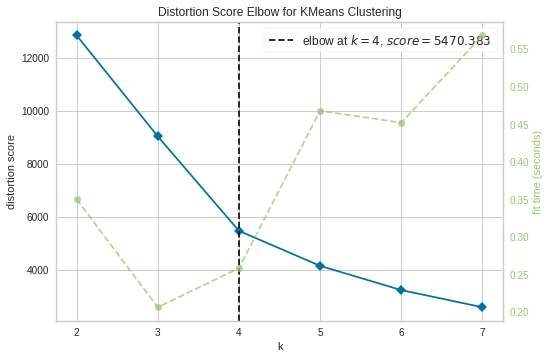

In [128]:
kmeans = KElbowVisualizer( c.KMeans(), k = clusters, timining = False )
kmeans.fit( x )
kmeans.show();

> A métrica wss leva em consideração o tamanho dos cluster, usando como parâmetro para os calculos a distância intra clusters. 

> Analisando os resultados, queremos encontrar o chamado "joelho", que é a quantidade de cluster que há uma diferença visual grande no gráfico, no caso de nosso plot este número é o k=3

## 7.2 Silhouette Score( SS )

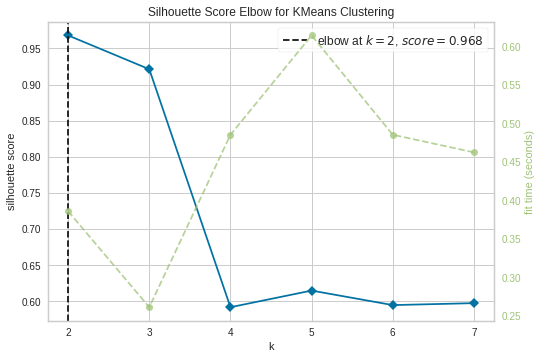

In [130]:
kmeans = KElbowVisualizer( c.KMeans(), k = clusters, metric='silhouette', timining = False )
kmeans.fit( x )
kmeans.show();

> A métrica SS, leva em consideração para o calculo tanto a distância intra cluster como a distânci entre os clusters.

> Analisando os resultados, queremos encontrar o número de K, que teja um valor de SS mais próximo de 1. No nosso caso o melhor S encontrado foi em K=2, porém vale ressaltar euq o k=3, ainda esta acima de 0,95 o que é muito bom também. 

> Como o wSS o k=3 teve melhor desempenho e no SS os desempenhos de k=2 e k=3 ficaram semelhantes, vamos definir de inicio o valor de k=3.

## 7.3 Silhouette Analysis

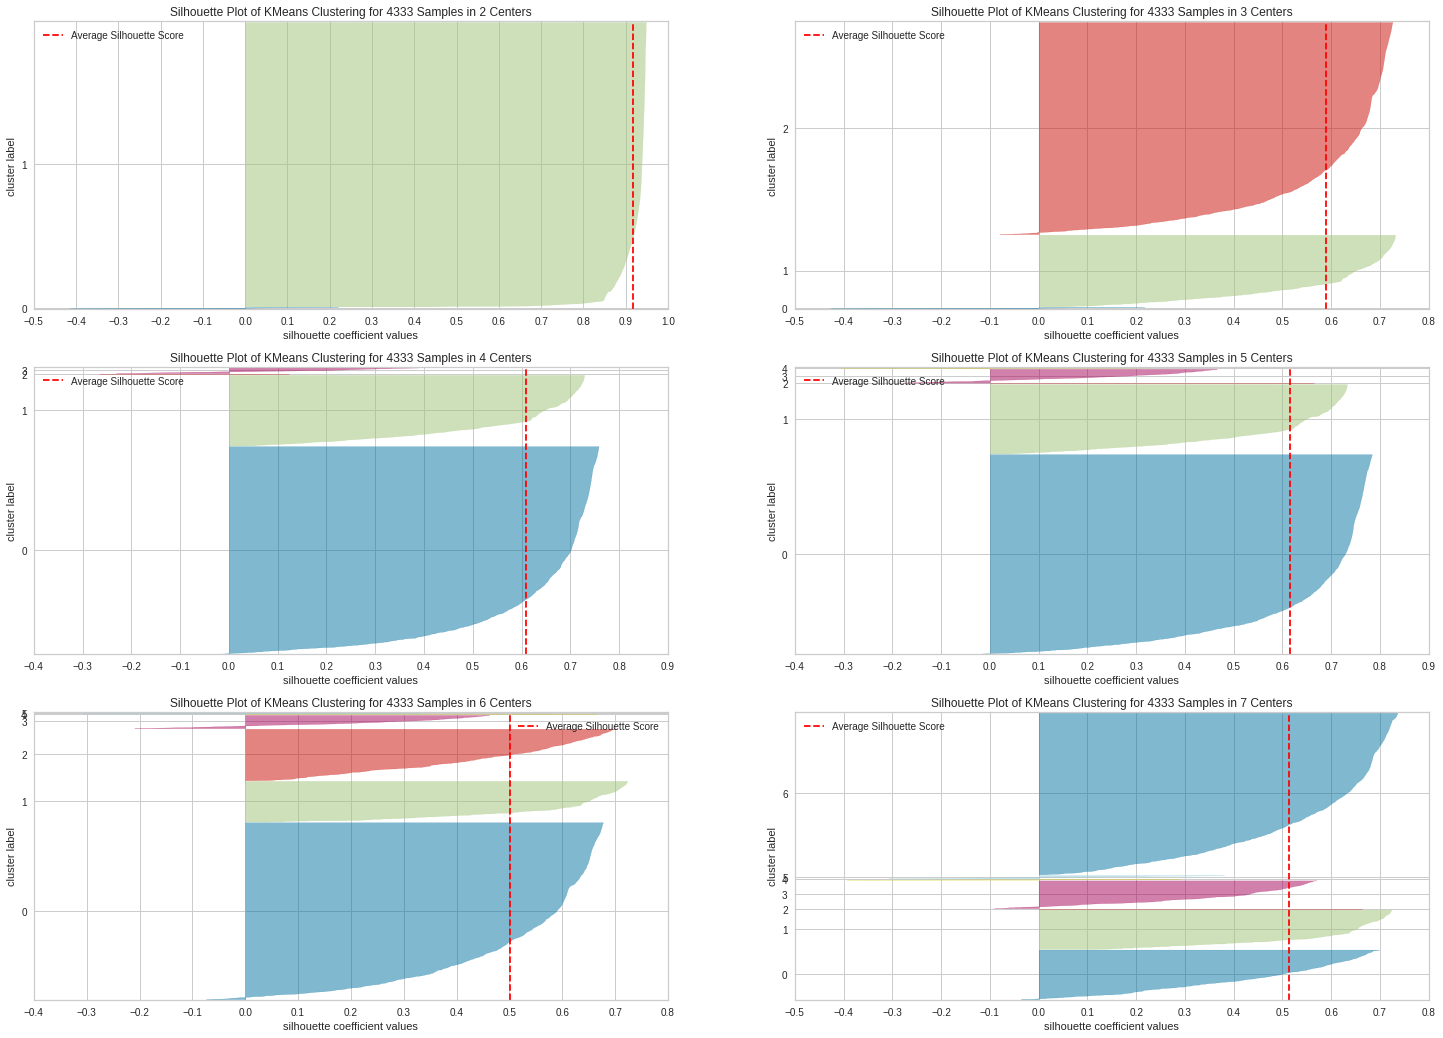

In [131]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18 ) )


for k in clusters:
    km = c.KMeans( n_clusters = k, init= 'random', n_init = 10, max_iter = 100, random_state = 42 )
    q, mod = divmod( k, 2 )
    visualizer = SilhouetteVisualizer( km, colors = 'yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( x );
    visualizer.finalize( );

# 8.0. Model Training

## 8.1 K-Means

#### Model Definition

In [133]:
# model definition
k= 3
kmeans = c.KMeans( init = 'random', n_clusters=k, n_init=10, max_iter=300 )

#model training
kmeans.fit( x )

#clustering
labels = kmeans.labels_



#### Cluster Validation

In [134]:
## wss( within-cluster sum of square )
print( 'wss values: {}'.format( kmeans.inertia_ ))

## SS( Silhouette Score)
print('SS Values:{}'.format( m.silhouette_score( x, labels, metric='euclidean')))

wss values: 9415.373836075656
SS Values:0.5885444793509821


# 9. Cluster Analysis

In [135]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.370887,2.798602,3.859875,-0.034222,0
1,13047,0.131411,-0.609844,0.743494,-0.033765,2
2,12583,0.581063,-0.899712,1.392740,-0.026509,2
3,13748,-0.123144,0.029864,0.094248,-0.023522,2
4,15100,-0.131178,2.408780,-0.165451,0.152247,0


## 9.1. Visualizatoin Inspection

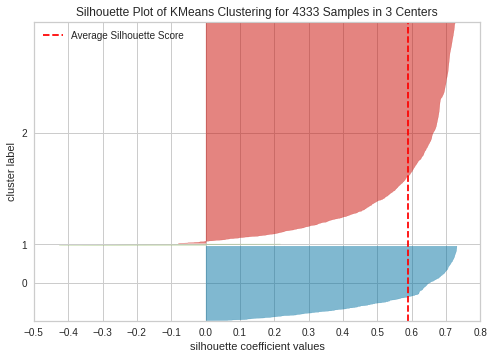

In [136]:
#fig = px.scatter_3d( df8, x= 'recency_days', y = 'invoice_no', z='gross_revenue', color= 'cluster' );
#fig.show()
visualizer = SilhouetteVisualizer( kmeans, colors = 'yellowbrick')
visualizer.fit(x)
visualizer.finalize();

## 9.2. 2d plot

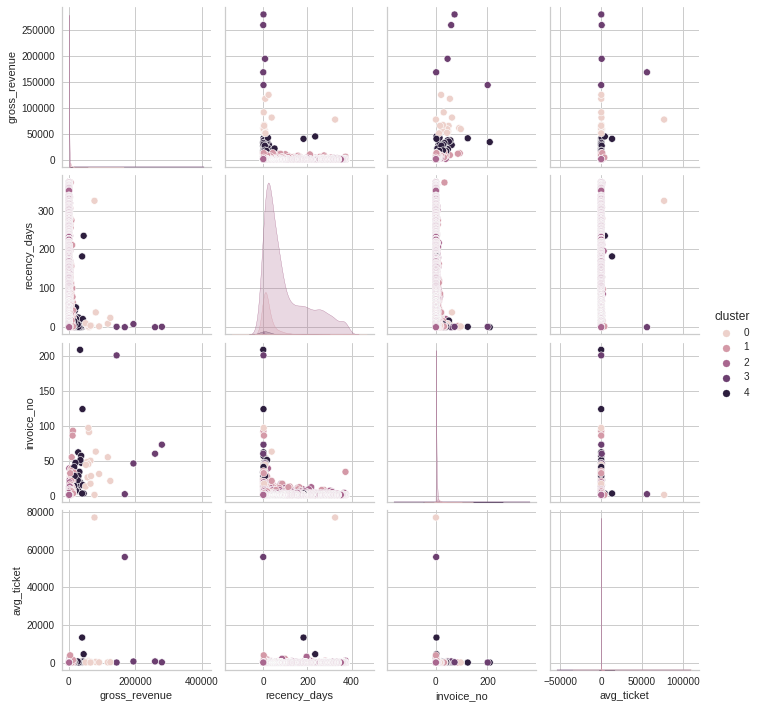

In [120]:
# 2d plot
df_viz = df9.drop( columns = 'customer_id', axis = 1 )
sns.pairplot( df_viz, hue = 'cluster' )

## 9.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

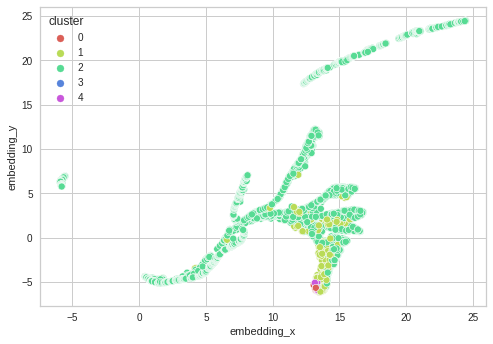

In [140]:
#UMAP

reducer = umap.UMAP( n_neighbors = 90, random_state=42 )
embedding = reducer.fit_transform( x )

#embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x= 'embedding_x', y = 'embedding_y',
              hue = 'cluster', 
              palette = sns.color_palette( 'hls', n_colors = len(df_viz['cluster'].unique() )),
              data= df_viz )
                

> O UMAP projeta uma visualização de mais alta dimensionalidade. Assim conseguimos analisar o quão misturados estão os clusters. 

> Os pontos próximos são classificados com a mesma cor, da para ver uma clara dominação do cluster 3(roxo), um dos motivos pode ser de não ter sido feito uma reescala dos cluster ainda. 

> Alterando o parâmetro n_neighbors, é possível visualizar estruturas mais globais, quando diminui, ele mostra visualização com menos agrupação, pois diminui a quantidade de visinhos. 

## 9.4. Cluster Profile

In [138]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster[ 'customer_id' ].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge ( df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')

#Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby ( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how = 'inner', on='cluster' )

#Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby ( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_invoice_no, how = 'inner', on='cluster' )

#AVG TIcket
df_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster


,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,1089,25.132703,-0.166363,1.536349,-0.349910,-0.010767
1,1,22,0.507731,10.331571,-0.722066,8.445914,4.192015
2,2,3222,74.359566,-0.014316,-0.514339,0.060597,-0.024984


 Cluster 01:  ( Candidato à Insider )
- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: $182.182,00 dólares

Cluster 02:
- Número de customers: 31 (0.71 do customers )
- Recência em média: 14 dias
- Compras em média: 53 compras
- Receita em média: $40.543,52 dólares

Cluster 03:
- Número de customers: 4.335 (99% do customers )
- Recência em média: 92 dias
- Compras em média: 5 compras
- Receita em média: $1.372,57 dólares

# 10.0. Deploy To Production